In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import os
from tqdm.notebook import tqdm
from pathlib import Path
import shutil


from music_plots import *
import numpy as np

In [2]:
files = os.listdir('data/spectrograms')
tracks_df = load("data/tracks.csv")
genres_df = load("data/genres.csv")

In [3]:
track_ids = []
print(files)
for file in tqdm(files):
    pre, ext = os.path.splitext(file)
    track_ids.append(int(pre))

['98236.png', '18350.png', '93363.png', '98550.png', '46238.png', '75194.png', '68853.png', '97887.png', '38902.png', '98578.png', '14542.png', '55293.png', '37416.png', '27611.png', '67235.png', '55287.png', '67553.png', '27177.png', '90695.png', '97844.png', '70775.png', '14581.png', '72604.png', '61491.png', '26902.png', '81565.png', '15476.png', '75396.png', '87100.png', '39188.png', '18146.png', '63292.png', '53379.png', '96743.png', '34484.png', '94632.png', '59654.png', '11638.png', '14740.png', '13749.png', '61452.png', '60994.png', '75427.png', '44822.png', '69768.png', '71133.png', '75433.png', '63251.png', '60758.png', '64516.png', '39605.png', '20432.png', '24898.png', '59683.png', '91164.png', '43022.png', '98626.png', '11764.png', '52649.png', '45335.png', '59708.png', '41147.png', '18032.png', '11770.png', '91170.png', '36481.png', '91158.png', '12537.png', '59720.png', '54576.png', '94034.png', '16745.png', '93983.png', '62749.png', '63457.png', '64338.png', '38321.png'

  0%|          | 0/140 [00:00<?, ?it/s]

In [4]:
#tracks_df.columns = pd.MultiIndex.from_product([['track'],['id']])
filtered_tracks = tracks_df.xs('track', level=0, axis=1)['genre_top'].loc[track_ids]
filtered_tracks

track_id
98236     Instrumental
18350             Folk
93363       Electronic
98550          Hip-Hop
46238     Experimental
             ...      
6608           Hip-Hop
6387     International
6393     International
4235     International
1417              Rock
Name: genre_top, Length: 140, dtype: category
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

Some tracks don't have a genre

In [5]:
filtered_tracks.isna().any()

False

Check all top level genres

In [6]:
filtered_tracks.unique()

['Instrumental', 'Folk', 'Electronic', 'Hip-Hop', 'Experimental', 'Pop', 'Rock', 'International']
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

In [7]:
filtered_tracks.loc[4037]

'Folk'

Generate directories

In [110]:
Path("dataset").mkdir(parents=True, exist_ok=True)

for genres in tqdm(filtered_tracks.unique()):
    Path("dataset/"+genres).mkdir(parents=True, exist_ok=True)

for track_id in tqdm(filtered_tracks.index):
    shutil.copyfile('data/spectrograms/' + str(track_id) + ".png", "dataset/" + filtered_tracks.loc[track_id] + "/" + str(track_id) + ".png")

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7847 [00:00<?, ?it/s]

In [11]:
#with tf.device('/cpu:0'):
#    data_augmentation = keras.Sequential(
#        [
#            layers.RandomFlip("horizontal"),
#            layers.RandomRotation(0.1),
#        ]
#    )

Eseguire da QUI

Second try


In [23]:
files = os.listdir('data/spectrograms')
track_ids = []
print(files)
for file in tqdm(files):
    pre, ext = os.path.splitext(file)
    track_ids.append(int(pre))

filtered_tracks = tracks_df.xs('track', level=0, axis=1)['genre_top'].loc[track_ids]
filtered_tracks

['73309.png', '32433.png', '127062.png', '131166.png', '14386.png', '66076.png', '30230.png', '67368.png', '143296.png', '73335.png', '122654.png', '122132.png', '71244.png', '43590.png', '126354.png', '25601.png', '71250.png', '124231.png', '38888.png', '132453.png', '126426.png', '75750.png', '55480.png', '117610.png', '129926.png', '112768.png', '115761.png', '12046.png', '129098.png', '12052.png', '113304.png', '115775.png', '99707.png', '133942.png', '58173.png', '19891.png', '75787.png', '80518.png', '45122.png', '118279.png', '134793.png', '51157.png', '10679.png', '116240.png', '42659.png', '81612.png', '62589.png', '96408.png', '116526.png', '122683.png', '28480.png', '21895.png', '30740.png', '109189.png', '118084.png', '13199.png', '127274.png', '108297.png', '72215.png', '132679.png', '70402.png', '93941.png', '76073.png', '133567.png', '17499.png', '144937.png', '123760.png', '133573.png', '137715.png', '43962.png', '11942.png', '122456.png', '65755.png', '141873.png', '73

  0%|          | 0/7847 [00:00<?, ?it/s]

track_id
73309             Rock
32433       Electronic
127062            Folk
131166            Rock
14386          Hip-Hop
              ...     
139537    Instrumental
83791             Rock
122671    Instrumental
67365              Pop
71507       Electronic
Name: genre_top, Length: 7847, dtype: category
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

In [58]:
img_shape = (484, 174)
top_model_weights_path = 'bottleneck_fc_model.h5'

Path("dataset_2").mkdir(parents=True, exist_ok=True)
#Path("dataset_2/train").mkdir(parents=True, exist_ok=True)
#Path("dataset_2/test").mkdir(parents=True, exist_ok=True)
#Path("dataset_2/validation").mkdir(parents=True, exist_ok=True)

train_ds, validation_ds, test_ds = np.split(filtered_tracks, [int(.8*len(filtered_tracks)), int(.9*len(filtered_tracks))])

print(f"Training has {len(train_ds)}, Validation has {len(validation_ds)}, Testing has {len(test_ds)}")

Training has 6277, Validation has 785, Testing has 785


In [59]:
labels = filtered_tracks.unique()
print(f"Labels found are: {labels}")

"""
for genres in tqdm(filtered_tracks.unique()):
    Path("dataset_2/train/"+genres).mkdir(parents=True, exist_ok=True)
    Path("dataset_2/validation/"+genres).mkdir(parents=True, exist_ok=True)
    Path("dataset_2/test/"+genres).mkdir(parents=True, exist_ok=True)
"""
for track_id in tqdm(train_ds.index):
    #shutil.copyfile('data/spectrograms/' + str(track_id) + ".png", "dataset_2/train/" + filtered_tracks.loc[track_id] + "/" + str(track_id) + ".png")
    shutil.copyfile('data/spectrograms/' + str(track_id) + ".png", "dataset_2/train/" +  str(track_id) + ".png")
for track_id in tqdm(validation_ds.index):
    shutil.copyfile('data/spectrograms/' + str(track_id) + ".png", "dataset_2/validation/" + str(track_id) + ".png")

train_size = len(train_ds)
validation_size = len(validation_ds)
test_size = len(test_ds)

print(f"Traing size {train_size}, validation size {validation_size}, testing size {test_size}")

Labels found are: ['Rock', 'Electronic', 'Folk', 'Hip-Hop', 'Pop', 'Instrumental', 'Experimental', 'International']
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6277 [00:00<?, ?it/s]

  0%|          | 0/785 [00:00<?, ?it/s]

Traing size 6277, validation size 785, testing size 785


In [55]:
# loading up our datasets
train_data_dir = 'dataset_2/train'
validation_data_dir = 'dataset_2/validation'
test_data_dir = 'dataset_2/test'

# number of epochs to train top model
epochs = 7 #this has been changed after multiple model run
# batch size used by flow_from_directory and predict_generator
batch_size = 50

In [169]:
from keras.layers import *

def model(width, height, depth, classes, finalAct="softmax"):
    model = Sequential()

    model.add(Flatten(input_shape=(height, width, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    return model

In [146]:
from keras_preprocessing.image import img_to_array

data = []
labels = []
training_images = os.listdir('dataset_2/train')
validation_images = os.listdir('dataset_2/validation')
for img in tqdm(training_images):
    image = tf.keras.preprocessing.image.load_img("dataset_2/train/" + img)
    image = img_to_array(image)
    data.append(image)

    pre, ext = os.path.splitext(img)
    labels.append(train_ds.loc[int(pre)])

validation_data = []
validation_labels = []
for img in tqdm(validation_images):
    image = tf.keras.preprocessing.image.load_img("dataset_2/validation/" + img)
    image = img_to_array(image)
    validation_data.append(image)

    pre, ext = os.path.splitext(img)
    validation_labels.append(validation_ds.loc[int(pre)])

  0%|          | 0/6277 [00:00<?, ?it/s]

  0%|          | 0/785 [00:00<?, ?it/s]

In [153]:
data = np.array(data, dtype="float") / 255.0
print(data.shape)
print(len(data))
labels = np.array(labels)
print("[INFO] data matrix: {} images ({:.2f}MB)".format(
	len(training_images), data.nbytes / (1024 * 1000.0)))

validation_data =  np.array(validation_data, dtype="float") / 255.0
validation_labels = np.array(validation_labels)


(6277, 174, 484, 3)
6277
[INFO] data matrix: 6277 images (12389.62MB)


In [170]:
model = model(
	width=484, height=174,
	depth=3, classes=8)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 252648)            0         
                                                                 
 dense_56 (Dense)            (None, 128)               32339072  
                                                                 
 dense_57 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 32,340,104
Trainable params: 32,340,104
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
from sklearn.preprocessing import LabelBinarizer

print(len(data))
print(data)
print(len(labels))
encoder = LabelBinarizer()
transformed_labels = encoder.fit_transform(labels)
print(len(labels))
validation_labels = encoder.fit_transform(validation_labels)

6277
[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...


In [187]:
history = model.fit(data, transformed_labels, validation_data=(validation_data, validation_labels), epochs=10, batch_size=64)

Epoch 1/10
99/99 [==============================] - 17s 170ms/step - loss: 2.0081 - accuracy: 0.1877 - val_loss: 1.8990 - val_accuracy: 0.2854
Epoch 2/10
99/99 [==============================] - 14s 138ms/step - loss: 1.9977 - accuracy: 0.1956 - val_loss: 1.8985 - val_accuracy: 0.3032
Epoch 3/10
99/99 [==============================] - 14s 140ms/step - loss: 1.9899 - accuracy: 0.2004 - val_loss: 1.8709 - val_accuracy: 0.2764
Epoch 4/10
99/99 [==============================] - 14s 143ms/step - loss: 1.9897 - accuracy: 0.1956 - val_loss: 1.8676 - val_accuracy: 0.2777
Epoch 5/10
99/99 [==============================] - 14s 137ms/step - loss: 1.9807 - accuracy: 0.1990 - val_loss: 1.8523 - val_accuracy: 0.3083
Epoch 6/10
99/99 [==============================] - 14s 140ms/step - loss: 1.9798 - accuracy: 0.2023 - val_loss: 1.8640 - val_accuracy: 0.2815
Epoch 7/10
99/99 [==============================] - 14s 145ms/step - loss: 1.9696 - accuracy: 0.2018 - val_loss: 1.8543 - val_accuracy: 0.3045

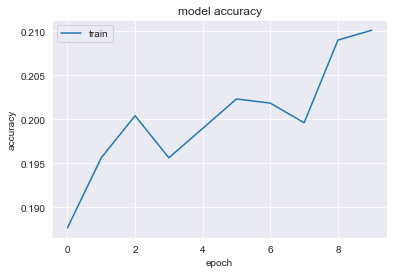

In [207]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [222]:
image = tf.keras.preprocessing.image.load_img("dataset/Electronic/26652.png")
image = img_to_array(image)
grr = [image]
grr = np.array(grr, dtype="float") / 255.0

print(encoder.inverse_transform(np.array([[1, 0, 0, 0, 0, 0, 0, 0]])))
print(encoder.inverse_transform(np.array([[0, 1, 0, 0, 0, 0, 0, 0]])))
print(encoder.inverse_transform(np.array([[0, 0, 1, 0, 0, 0, 0, 0]])))
print(encoder.inverse_transform(np.array([[0, 0, 0, 1, 0, 0, 0, 0]])))
print(encoder.inverse_transform(np.array([[0, 0, 0, 0, 1, 0, 0, 0]])))
print(encoder.inverse_transform(np.array([[0, 0, 0, 0, 0, 1, 0, 0]])))
print(encoder.inverse_transform(np.array([[0, 0, 0, 0, 0, 0, 1, 0]])))
print(encoder.inverse_transform(np.array([[0, 0, 0, 0, 0, 0, 0, 1]])))
model.predict(grr)

['Electronic']
['Experimental']
['Folk']
['Hip-Hop']
['Instrumental']
['International']
['Pop']
['Rock']
1/1 [==============================] - 0s 8ms/step


array([[3.81808e-20, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00]], dtype=float32)